# Week 5 Assignment
Date: March 10, 2025

Author: Peter La

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Import Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib inline
dpi = 300
sns.set()

##### Import Dataset

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/msds670/customer_support.csv')
df.sample(10)

,call_agent,during_call_wait_time,incoming_call_wait_time,gender,call_purpose,call_rating,region,time_window
50,Jane Smith,1,8,Female,Product Support,5,South,2pm-5pm
48,Dave Trellis,20,1,Male,Product Support,1,South,5pm-7pm
96,Jimmy Town,4,5,Male,Product Support,3,West,9am-11am
32,Andrea Dean,20,3,Female,Product Support,4,South,8am-10am
82,Dave Trellis,13,3,Male,Complaint,2,West,7pm-9pm
30,Jimmy Town,2,4,Male,Sales Support,3,South,2pm-5pm
18,Andrea Dean,12,5,Female,Product Support,4,South,2pm-5pm
80,Andrea Dean,1,4,Female,Product Support,2,West,8am-10am
39,Andrea Dean,20,2,Female,Product Support,3,North,9am-11am
97,Kate Olsen,5,10,Female,Sales Support,1,West,7pm-9pm


In [12]:
#Create directories
path = '/content/drive/MyDrive/msds670/'

##### Plot 1

In [5]:
# Group average call rating by time window
avg_rating_by_time = df.groupby('time_window')['call_rating'].mean().sort_index()


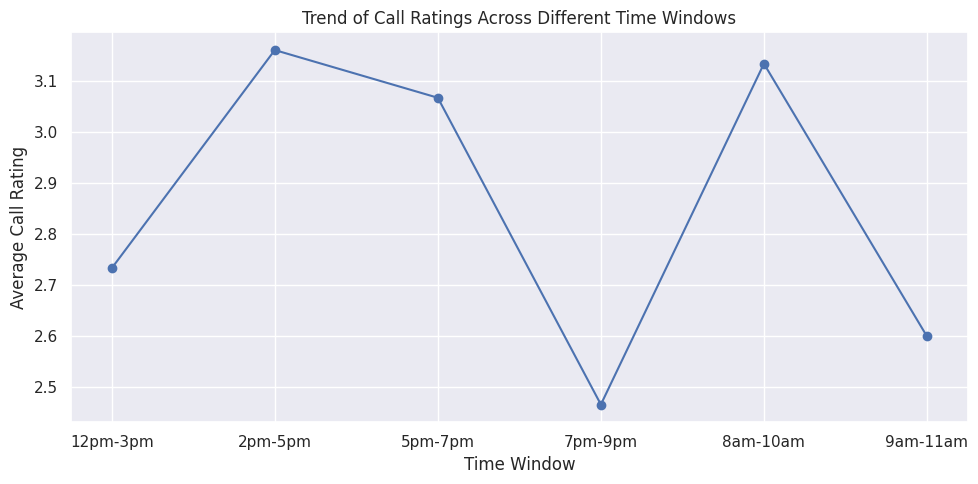

In [9]:
# Plot 1
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(avg_rating_by_time.index, avg_rating_by_time.values, marker='o', linestyle='-')
ax.set_title('Trend of Call Ratings Across Different Time Windows')
ax.set_xlabel('Time Window')
ax.set_ylabel('Average Call Rating')

plt.tight_layout()

In [11]:
plot1_filename = 'avgratebytime.png'
fig.savefig(path + plot1_filename, dpi=dpi)

In [13]:
# Group average wait time by time window
avg_wait_by_time_window = df.groupby('time_window')[['during_call_wait_time', 'incoming_call_wait_time']].mean().sort_index()


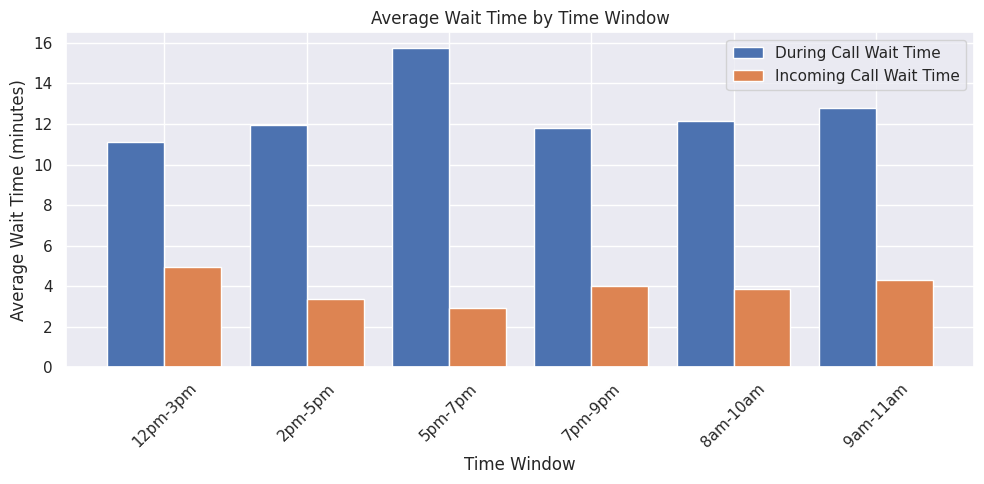

In [30]:
# Plot 2
fig, ax = plt.subplots(figsize=(10,5))

x_pos = np.arange(len(avg_wait_by_time_window.index))

width = 0.4

ax.bar(x_pos - width/2, avg_wait_by_time_window['during_call_wait_time'], width, label='During Call Wait Time')
ax.bar(x_pos + width/2, avg_wait_by_time_window['incoming_call_wait_time'], width, label='Incoming Call Wait Time')
ax.set_xticks(x_pos)
ax.set_xticklabels(avg_wait_by_time_window.index, rotation=45)
ax.set_title('Average Wait Time by Time Window')
ax.set_xlabel('Time Window')
ax.set_ylabel('Average Wait Time (minutes)')
ax.legend()

plt.tight_layout()

In [23]:
plot2_filename = 'avgwaitbytimewindow.png'
fig.savefig(path + plot2_filename, dpi=dpi)

In [26]:
# Count of calls by time window to identify peak hours
call_volume_by_time_window = df['time_window'].value_counts().sort_index()


<ipython-input-32-5b352777e54e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=45)


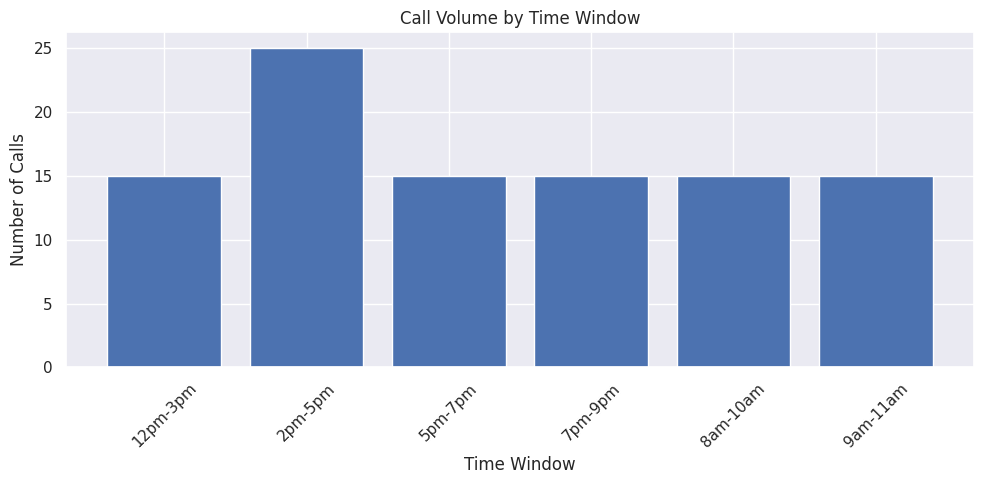

In [32]:
# Plot 3

fig, ax = plt.subplots(figsize=(10, 5))

x = call_volume_by_time_window.index  # Time windows
y = call_volume_by_time_window.values # Call volumes

ax.bar(x, y)
ax.set_xlabel('Time Window')
ax.set_ylabel('Number of Calls')
ax.set_title('Call Volume by Time Window')
ax.set_xticklabels(x, rotation=45)

plt.tight_layout()

In [33]:
plot3_filename = 'callsbytimewindow.png'
fig.savefig(path + plot3_filename, dpi=dpi)

In [35]:
# Merging call volume data with average wait times
time_window_analysis = df.groupby('time_window').agg(
    call_count=('call_purpose', 'count'),
    avg_during_call_wait=('during_call_wait_time', 'mean'),
    avg_incoming_wait=('incoming_call_wait_time', 'mean')
).sort_index()


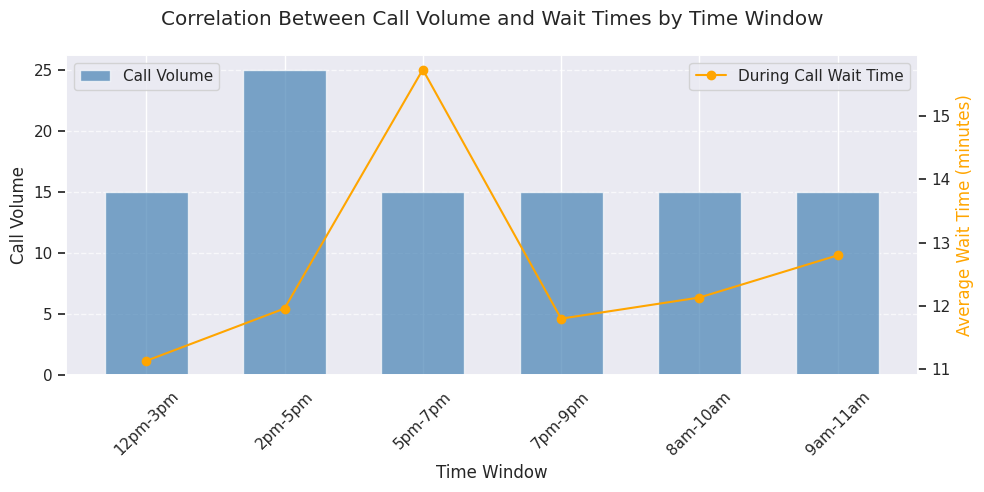

In [57]:
# Plot 4
fig, ax1 = plt.subplots(figsize=(10, 5))

color1 = 'steelblue'
color2 = 'orange'

width = 0.6

ax1.set_xlabel('Time Window')
ax1.set_ylabel('Call Volume')
ax1.bar(time_window_analysis.index, time_window_analysis['call_count'], color=color1, alpha=0.7, width=width, label='Call Volume')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Wait Time (minutes)', color=color2)
ax2.plot(time_window_analysis.index, time_window_analysis['avg_during_call_wait'],
         color=color2, marker='o', linestyle='-', label='During Call Wait Time')

ax1.tick_params(axis="x", rotation=45)
ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax2.grid(False)

fig.suptitle('Correlation Between Call Volume and Wait Times by Time Window')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()


In [58]:
plot4_filename = 'correlation.png'
fig.savefig(path + plot4_filename, dpi=dpi)